# Problem 3: Least squares and regression (3pts out of 15)

## Author: Ostap Dyhdalovych and Volodymyr Kuchynskyi

#### The aim of this assignment is to understand how the idea of the least square solution for system of linear equations can be used to fit and model data with non-linear dependence. The task is to suggest a good time series model for real data of temperature over a long period of time


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


## 1. Least squares and simple linear regression

#### Least squares quick refresher
Consider an ***inconsistent*** system of linear equations $$ A\mathbf{x} = \mathbf{y}$$
Inconsistency means that no solution $\mathbf{x}$ exists, i.e. $\mathbf{y} \notin \mathbf{Col}{(A)}$. However, at least one ***least squares solution*** of such system always exists, and it is ***the best approximate solution***. The least squares solution $\mathbf{\hat{x}}$ is the solution to the ***normal equation*** 
$$A^{\top}A\mathbf{\hat{x}} = A^{\top}\mathbf{y}$$
if the columns of $A$ are linearly independent, then $A^\top A$ is invertible, and the solution is
$$ \mathbf{\hat{x}} = (A^{\top}A)^{-1} A^{\top}\mathbf{y}$$


### **1.1 (0.3 pts)**

We start with the simplest case of linear (affine) model, in which both the  predictor $x$ and the responce $y$ are scalar, and we are looking for the linear dependence 
$$ f(x) = a x + b $$
Fill in the missing parts in the code below

> **_NOTE:_** you have to implement the least squares solution by solving the normal equation using basic numpy operations and functions. The use of preexisting solvers, such as `linalg.lstsq` from numpy or from any other library is forbidden.

In [3]:
def solve_least_squares(x: np.ndarray, y:np.ndarray) -> np.ndarray:
    """
    Args:
        x: 1D array of inputs (predictors)
        y: 1D array of outcomes (responses)
    Returns:
        array(slope, intercept): coeff of the linear function
    """
    assert x.ndim == 1
    assert y.ndim == 1
    assert x.shape[0] == y.shape[0]

    slope = 0
    intercept = 0
    # ========= YOUR CODE STARTS HERE ========= #
    # solve the least square problems solving the corresponding normal equation
    A = np.array([x, np.ones(len(x))]).T
    slope, intercept = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
    # ========== YOUR CODE ENDS HERE ========== #
    return np.array([slope, intercept])

In [4]:
def test_solve_least_squares():
    x = np.arange(1, 10)
    y = 3*x + 1

    coeffs = solve_least_squares(x, y)
    # print(coeffs)
    assert np.isclose(coeffs, np.array([3, 1])).all(), 'Incorrect coefficients computed'
    print("TEST 1: SUCCESS")

test_solve_least_squares()

TEST 1: SUCCESS


## 2. Dataset 
We will analyze the dataset of average monthly temperatures from 1850 till 2015 

In [5]:
temp_data = pd.read_csv("Task3_data.csv")
temp_data["date"] = pd.to_datetime(temp_data["date"])
# temp_data["month"] = temp_data['date'].map(lambda x: (x.year*12 + x.month))
temp_data.describe()

,avg_temp
count,1992.000000
mean,8.571583
std,4.263193
min,0.404000
25%,4.430000
50%,8.850500
75%,12.858500
max,15.482000


In [6]:
year_data = temp_data.groupby(temp_data['date'].map(lambda x: x.year)).mean().reset_index()
year_data

/var/folders/5p/lgx4rm5919jfcfx0sd2b_n2m0000gq/T/ipykernel_20663/3899421992.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_data = temp_data.groupby(temp_data['date'].map(lambda x: x.year)).mean().reset_index()


,date,avg_temp
0,1850,7.900667
1,1851,8.178583
2,1852,8.100167
3,1853,8.041833
4,1854,8.210500
...,...,...
161,2011,9.516000
162,2012,9.507333
163,2013,9.606500
164,2014,9.570667


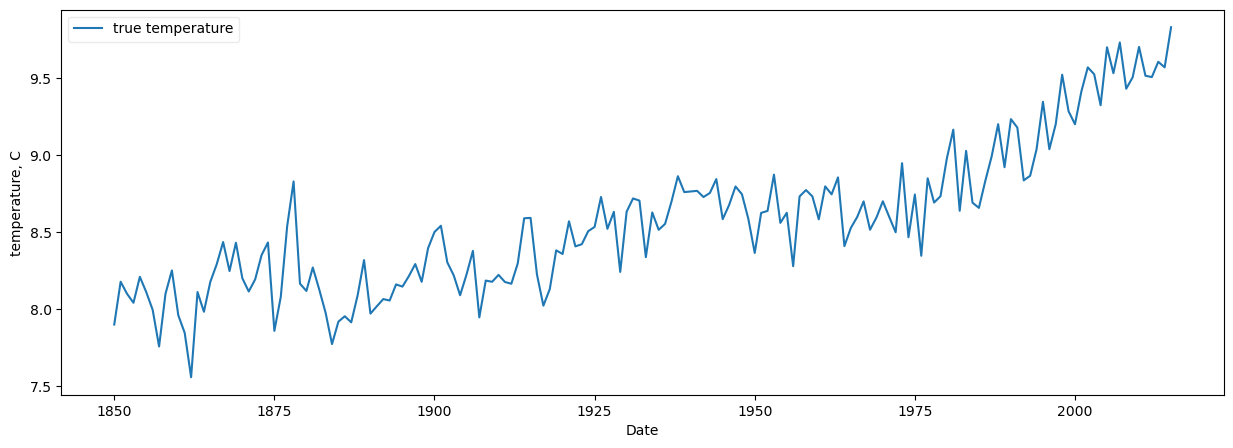

In [7]:
def plot_temps(time, data, prediction=None):
    plt.figure(figsize=(15,5))
    plt.plot(time, data, label="true temperature")

    if not (prediction is None):
        plt.plot(time, prediction, label="predicted temperature")

    plt.xlabel("Date")
    plt.ylabel("temperature, C")
    plt.legend(framealpha=0.4)
    plt.show()

plot_temps(year_data["date"], year_data["avg_temp"])


<!-- Yearly data: Least squares for linear regression -->

## 3. Linear trend for yearly temperature

### **3.1 (0.3 pts)** Find the linear trend for temepratures by solving the corresponding least square problem

In [8]:
def RMSE(predicted, reference):
    return np.sqrt(np.mean((predicted - reference)**2))

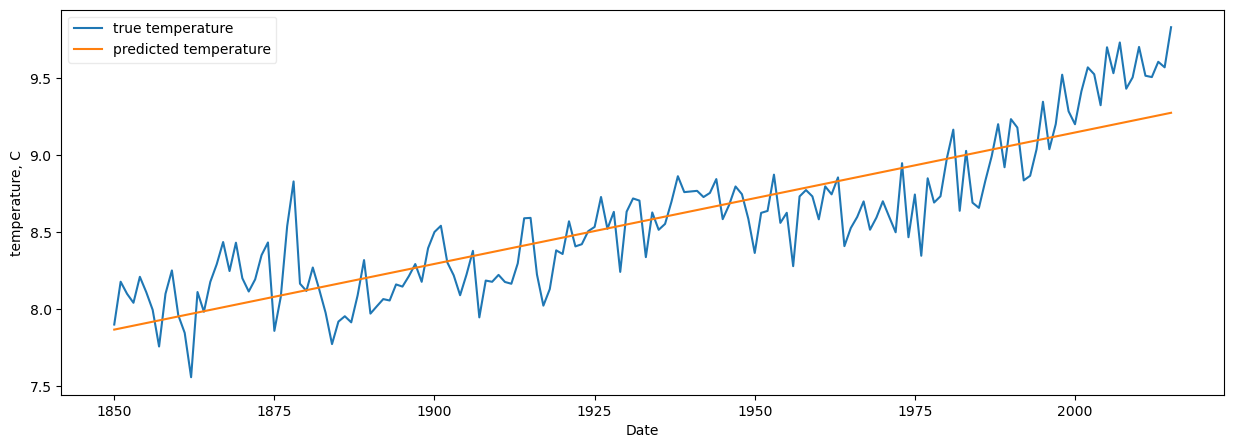

RMSE:  0.23640974195999218


In [9]:
years = np.arange(year_data.shape[0])
slope = None
intercept = None
# ========= YOUR CODE STARTS HERE ========= #
#  Calculate slope and intercept using the function 'solve_least_squares'
slope, intercept = solve_least_squares(years, year_data["avg_temp"])
# Predict temperature using a linear model
predicted_temps = years * slope + intercept

# ========== YOUR CODE ENDS HERE ========== #

plot_temps(year_data["date"], year_data["avg_temp"], predicted_temps)
print("RMSE: ", RMSE(predicted_temps, year_data["avg_temp"]))

## 4. Multilinear regression

In a more general case, we want to represent our target variable as a linear combination of several predictors:
$$ y = a_0 + a_1x_1 + a_2x_2+ \dots + a_nx_n$$

--- 

### **4.1 (0.3 pts)** Explain how to apply the least squares method in order to obtain the coefficients $( a_0, a_1, ..., a_n )$ that minimize the sum of squared residuals 
$$ \sum_{j=1}^N |y_j - a_0 - a_1x_{1,j} - a_2x_{2,j} - \dots - a_nx_{n,j}|^2 $$

---

In order to find the coefficients, we have to solve the equation $Ax = b$. \
But this system is not always consistent. This way, we need to find the best solution.\
In other words, the one that minimizes the difference $b - Ax$.

Basically, $b - A\hat{x}$ is going to be the orthogonal projection of $b$ to the $Col(A)$ when the system is not consistent.

For not consistent systems, we find $\hat{x}$ of $Ax = b$. So, $b_{proj}$ to $Col(A)$ is going to be equal $A\hat{x}$ using the formula:

$$ \mathbf{\hat{x}} = (A^{\top}A)^{-1} A^{\top}\mathbf{y}$$

---

### **4.2 (0.4 pts)** Implement multilinear regression in the chunks below

In [10]:
# Multilinear regression via normal equation
def solve_least_squares_general(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Args:
        X: 2D array (x_1, x_2, ..., x_n) of basis variables
        y: 1D array of res 
    Returns:
        Coeffs: slope for each variable in X and intercept
    """
    assert X.ndim == 2
    assert X.shape[1] == y.shape[0]
    assert y.ndim == 1
    n = y.shape[0]
    # coeffs = np.zeros(A.shape[1])
    # ========= YOUR CODE STARTS HERE ========= #
     # solve the normal equation derived in the previous part
    A = np.vstack([np.ones(X.shape[1]), X]).T
    coeffs = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
    # ========== YOUR CODE ENDS HERE ========== #
    assert coeffs.shape[0] == X.shape[0] + 1  # slope for each x + intercept

    return coeffs

In [11]:
# predict the values of responce variable in multiplinear regression
def predict_general(X: np.ndarray, coeffs:np.ndarray) -> np.ndarray:
    """
    Args:
        X: 2D array (x_1, x_2, ..., x_n) of basis variables
        Coeffs: slope for each variable in X and intercept
    Returns:
        y: predicted values
    """
    assert X.ndim == 2
    assert coeffs.ndim == 1
    assert coeffs.shape[0] == X.shape[0] + 1  # slope for each x + intercept

    # ========= YOUR CODE STARTS HERE ========= #
    return coeffs.dot(np.vstack([np.ones(X.shape[1]), X]))
    # ========== YOUR CODE ENDS HERE ========== #

In [12]:
def test_solve_least_squares_general():
    x1 = np.arange(1, 10)
    x2 = x1**2
    y = 1 + 3*x1 + 2*x2
    X = np.array([ x1, x2 ])

    coeffs = solve_least_squares_general(X, y)
    assert np.isclose(coeffs, np.array([1, 3, 2])).all(), 'Incorrect coefficients computed'
    print("TEST 2: SUCCESS")

test_solve_least_squares_general()

TEST 2: SUCCESS


## 5. Linear structural dependence 

In a more general case, we want to represent our target variable as a linear combination of some basis (possibly non-linear) functions of a scalar predictor $x$:
$$ F(x) = a_0 + a_1f_1(x) + a_2f_2(x)+... + a_nf_n(x)$$

--- 

### **5.1 (0.3 pts)** Exlain how to apply the least squares method in this case to find the optimal coefficients $( a_0, a_1, ..., a_n )$.

---

Everything from the #4.1 applies here.\
Except, we have to engineer new features for our scalar predictor $x$, by applying the function any f_n(x) to the original values of x.\
And add this features as new columns to your X matrix.\

---

### **5.2 (0.3 pts)** Solve the previous problem using 2 basis functions $f_1(x) = x$ and $f_2(x) = x^2$. Compare the accuracy with the previous model

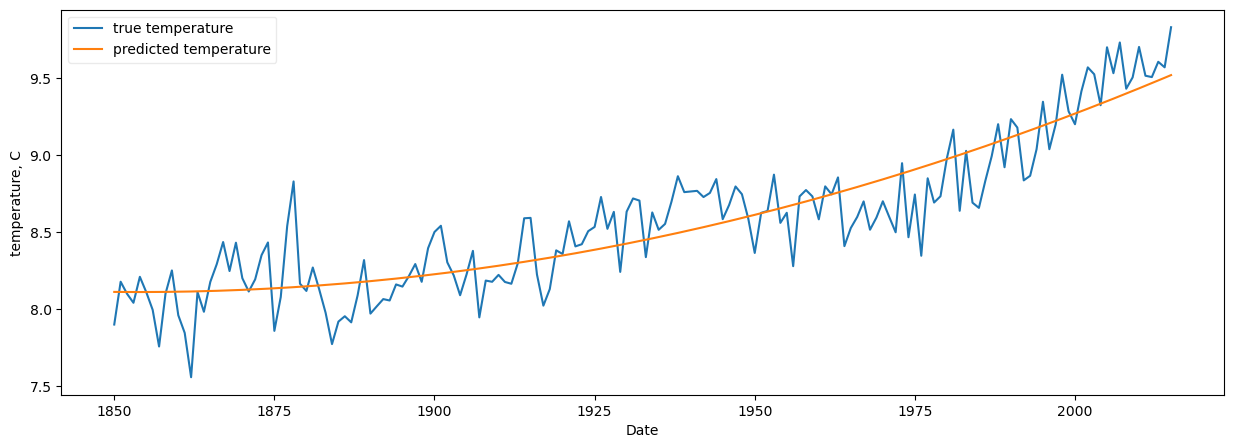

RMSE:  0.20849333659587174


In [13]:
coeffs = None
# ========= YOUR CODE STARTS HERE ========= #
X = np.array([years, years * years])
#  Calculate slope and intercept using least squares
coeffs = solve_least_squares_general(X, year_data["avg_temp"])
# Predict temperature using a linear structural model
predicted_temps = predict_general(X, coeffs)
# ========== YOUR CODE ENDS HERE ========== #

plot_temps(year_data["date"], year_data["avg_temp"], predicted_temps)

print("RMSE: ", RMSE(predicted_temps, year_data["avg_temp"]))

## 6. Modelling monthly temperatures

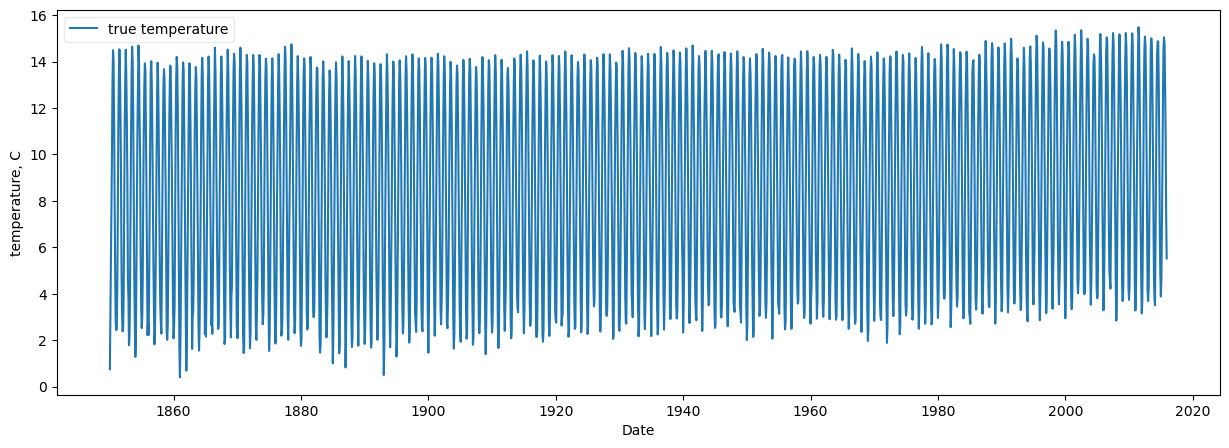

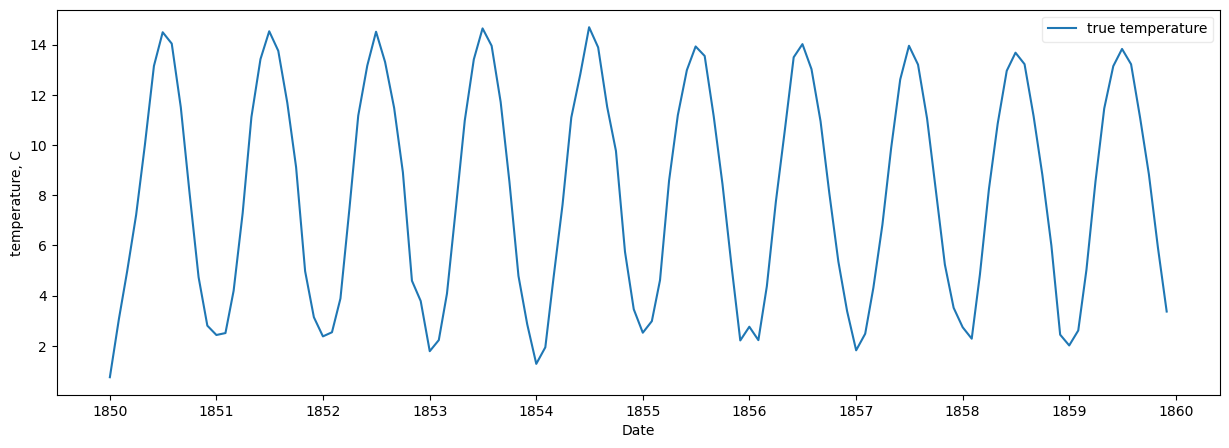

In [14]:
# Let's try to predict temperature on a monthly basis
plot_temps(temp_data["date"], temp_data["avg_temp"])
# Look at the first 10 for better resolution
plot_temps(temp_data[:120]["date"], temp_data[:120]["avg_temp"])

### **6.1 (0.4 pts)** We see periodical dependence in the monthly temperatures, so let's fit linear structural model with periodical functions: $$f_1(x)=\sin\bigg(\frac{2\pi x}{T}\bigg)$$; $$f_2(x)=\cos\bigg(\frac{2\pi x}{T}\bigg)$$ where $T=12$ is the period in months

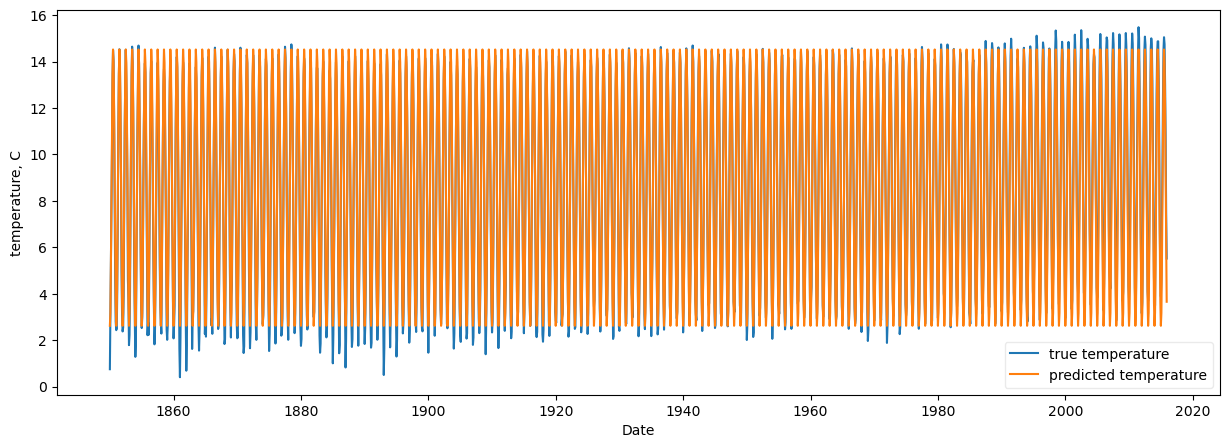

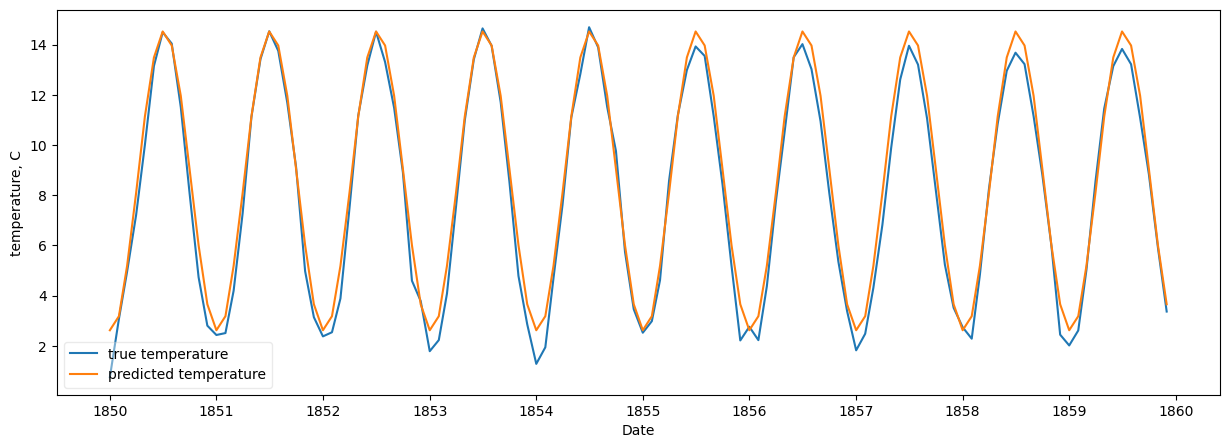

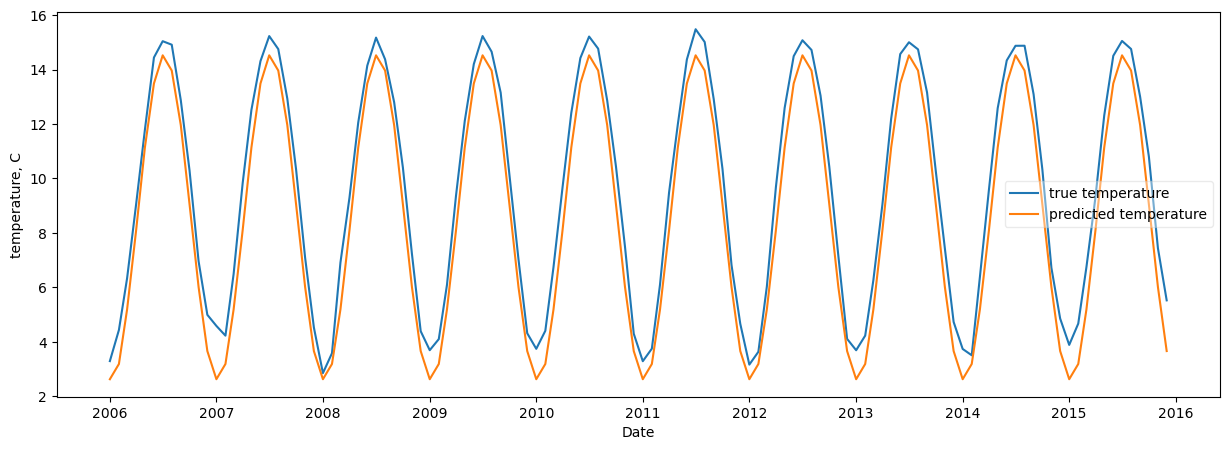

RMSE:  0.5848254249227474


In [15]:
import math
# We see periodical dependence, so let's try least squares with periodical functions: f1=sin(2*pi*x/T), f2=cos(2*pi*x/T)
# Where T=12 is a period in months
months = np.arange(temp_data.shape[0])
coeffs = None
# ========= YOUR CODE STARTS HERE ========= #
X_month = np.array([np.sin(2 * math.pi * months / 12), np.cos(2 * math.pi * months / 12)])
#  Calculate slope and intercept using least squares
coeffs = solve_least_squares_general(X_month, temp_data["avg_temp"])
# Predict temperature using a linear model
predicted_temps = predict_general(X_month, coeffs)
# ========== YOUR CODE ENDS HERE ========== #

# Make conclusions about the fit accuracy
plot_temps(temp_data["date"], temp_data["avg_temp"], predicted_temps)
# First 10 years:
plot_temps(temp_data["date"][:120], temp_data["avg_temp"][:120], predicted_temps[:120])
# Last 10 years:
plot_temps(temp_data["date"][-120:], temp_data["avg_temp"][-120:], predicted_temps[-120:])

print("RMSE: ", RMSE(predicted_temps, temp_data["avg_temp"]))


## 7. Combining the results

### **7.1 (0.3 pts)** Combine the basis functions used in two previous tasks to get an even better result

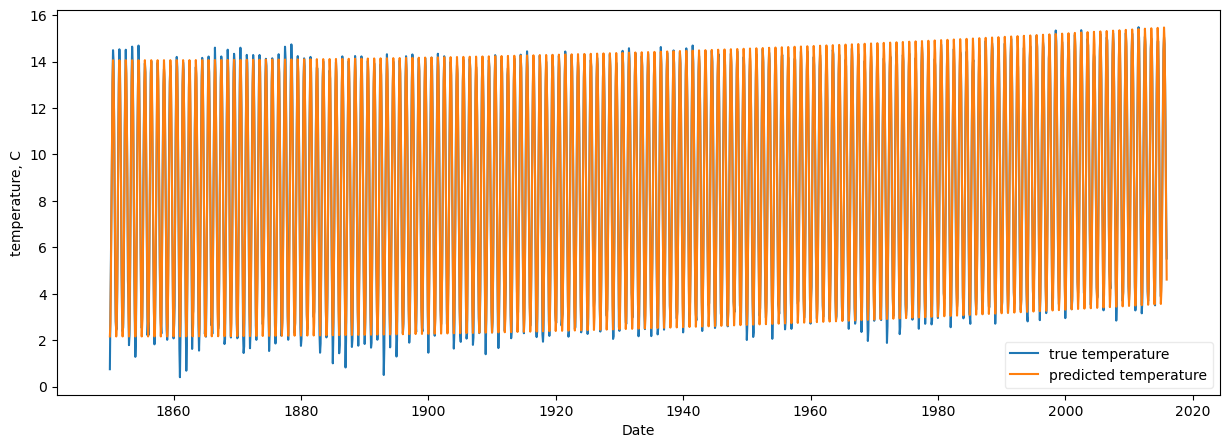

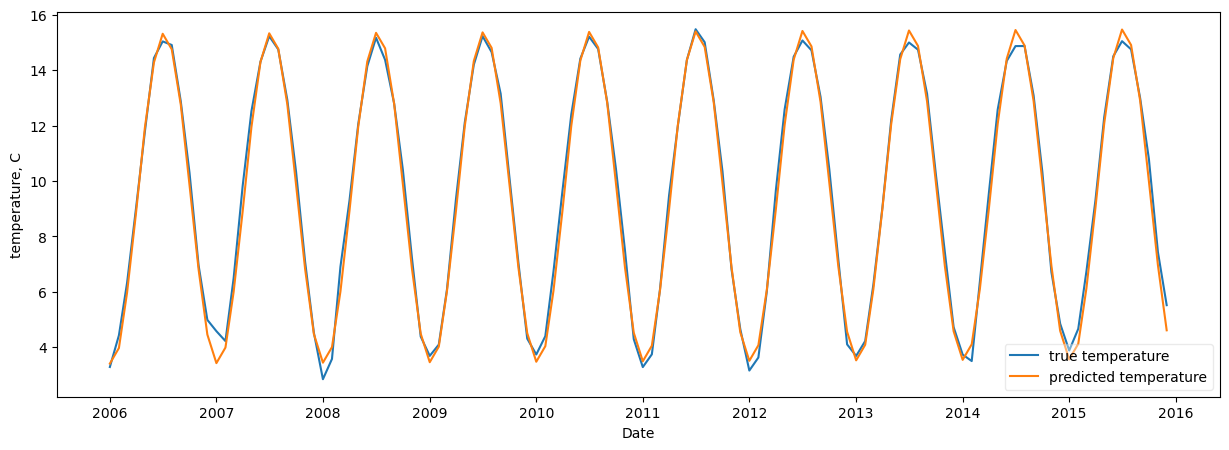

RMSE:  0.4030948513969517


In [16]:
months = np.arange(temp_data.shape[0])
coeffs = None
# ========= YOUR CODE STARTS HERE ========= #
X_month = np.array([np.sin(2 * math.pi * months / 12), np.cos(2 * math.pi * months / 12),
                    months, months * months])
#  Calculate slope and intercept using least squares
coeffs = solve_least_squares_general(X_month, temp_data["avg_temp"])
# Predict temperature using a linear model
predicted_temps = predict_general(X_month, coeffs)
# ========== YOUR CODE ENDS HERE ========== #

plot_temps(temp_data["date"], temp_data["avg_temp"], predicted_temps)
# Last 10 years:
plot_temps(temp_data["date"][-120:], temp_data["avg_temp"][-120:], predicted_temps[-120:])

print("RMSE: ",  RMSE(predicted_temps, temp_data["avg_temp"]))


## 8. Summary (0.4 pts)

---

Summarize in a few sentences what you have learned and achieved by completing the tasks of this assignment

--- 

Working with historical data we learned to fit linear regression using least squares method.\
And find out that this applies not only to fully linear data but also, at least, periodic one.\
We fitted the regression model with the only one variable as well as the multi-variable regression.\
Except that, using the least squares method we find the orthogonal projection to our data, which is, in fact, the minimized solution of $b - Ax$.